# Numpy

NumPy is the fundamental package for scientific computing with Python. It contains among other things:

  * a powerful N-dimensional array object <== today's subject
  * sophisticated (broadcasting) functions <== today's subject
  * tools for integrating C/C++ and Fortran code <== not treated 
  * random number <== today's subject
  * linear algebra, Fourier transform, etc. <== later in the course 

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data (can be used to handle N-dimensional arrays). Arbitrary data-types can be defined and this allows NumPy to seamlessly and speedily integrate with a wide variety of projects.



In [2]:
import numpy as np # importing convention (you can call it as you want but np is mostly used)

# Arrays

A numpy array is a grid of values, **all of the same type** (whereas lists can also be heterogeneous), and is indexed by a tuple of nonnegative integers. It might seem like a limitation but it's actually good.

With respect to standard python lists, Numpy provides:
* extension package to Python for multi-dimensional arrays
* closer to hardware (efficiency)
* designed for scientific computation (convenience)
* Also known as array oriented computing


All standard data types are available:

In [3]:
# type can be set
a=np.array([1, 2, 3],'float64') #how to define a np array: 
                                #it takes two arguments the object and the type of elements in the array
print (a,a.dtype,'\n')
a=np.array([1, 2, 3],'uint32')
print (a,a.dtype,'\n')

# or inferred: 
a=np.array([1, 2, 3.3]) #if you don't specify the type it is inferred (here it's float)
print (a,a.dtype,'\n')

# complex
a=np.array([1+2j, 3+4j, 5+6*1j]) #j is the imaginary unit!! Its 2 times a float per element --> complex 128
print (a,a.dtype,'\n')

# bool
a = np.array([True, False, False, True])
print (a,a.dtype,'\n')

# string
a=np.array(['bonjour messieurs dames', 'Hello', 'Hallo'])
print (a,a.dtype,'\n')


[1. 2. 3.] float64 

[1 2 3] uint32 

[1.  2.  3.3] float64 

[1.+2.j 3.+4.j 5.+6.j] complex128 

[ True False False  True] bool 

['bonjour messieurs dames' 'Hello' 'Hallo'] <U23 



Arrays are memory-efficient container that provides fast numerical operations

In [4]:
# standard python
L = range(1000)
%timeit [i**2 for i in L]

# numpy
a = np.arange(1000)
%timeit a**2


#we square up all the elements of an array: with numpy its much faster

257 µs ± 6.35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)
1.63 µs ± 17.3 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


### Dimensions

These arrays can be thought as matrices (N-dimensional vectors). The number of dimensions is the rank of the array; the shape of an array is a tuple of integers giving the size of the array along each dimension.

1D containers

In [6]:
a1 = np.array([0, 1, 2, 3])
print (a1)
print ("array dimensions (rank):", a1.ndim) #ndim is dimension (rank)
print ("shape of the array:", a1.shape) #shape is length of all dimensions
print ("size of the first dimension (axis):", len(a1)) #len gives legth of 1st dimension 
#if you don't know the dimension and have an array of dim>1 then len is kinda useless

[0 1 2 3]
array dimensions (rank): 1
shape of the array: (4,)
size of the first dimension (axis): 4


2D, 3D and so on

In [9]:
#2D
a2_3 = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array (dim x rows x columns)
print ("2 x 3 array:") 
print (a2_3) #prints the rows of the array (matrix form) 
print ("array dimensions (rank):", a2_3.ndim) #gives rank
print ("shape of the array:", a2_3.shape) #gives length of all axis
print ("size of the first dimension (axis):", len(a2_3)) #length of 1st axis

print ("")

#3D
a2_3_2 = np.array([[[1,10], [2,20], [3,30]], [[4,40], [5,50], [6,60]]])# 2 x 3 x 2 array (dim x raws x columns)
print ("2 x 3 x 2 array:")
print (a2_3_2)
print ("array dimensions (rank):", a2_3_2.ndim)
print ("shape of the array:", a2_3_2.shape)
print ("size of the first dimension (axis):", len(a2_3_2)) #dimensions are called axis
print ("")
a2_2_3 = np.array([[[1,10], [2,20]], [[3,30], [4,40]], [[5,50], [6,60]]]) # 2 x 2 x 3 array (dim x raws x columns)
print ("2 x 2 x 3 array:")
print (a2_2_3)
print ("array dimensions (rank):", a2_2_3.ndim)
print ("shape of the array:", a2_2_3.shape)
print ("size of the first dimension (axis):", len(a2_2_3)) #dimensions are called axis

2 x 3 array:
[[0 1 2]
 [3 4 5]]
array dimensions (rank): 2
shape of the array: (2, 3)
size of the first dimension (axis): 2

2 x 3 x 2 array:
[[[ 1 10]
  [ 2 20]
  [ 3 30]]

 [[ 4 40]
  [ 5 50]
  [ 6 60]]]
array dimensions (rank): 3
shape of the array: (2, 3, 2)
size of the first dimension (axis): 2

2 x 2 x 3 array:
[[[ 1 10]
  [ 2 20]]

 [[ 3 30]
  [ 4 40]]

 [[ 5 50]
  [ 6 60]]]
array dimensions (rank): 3
shape of the array: (3, 2, 2)
size of the first dimension (axis): 3


### Generating arrays

back an forth from a list (i.e. a numpy array is NOT a list):

In [3]:
l = [0, 1, 2, 3]
a = np.array(l)
print (a.tolist(), type(a.tolist())) #turn a np array back into a list

[0, 1, 2, 3] <class 'list'>


Copies and views:

In [10]:
a = np.array([1,2,3])
b = a # a view ("points to the address of the same object with a different name") --> b and a ARE THE SAME!!!
c = a.copy() # a copy
a[0] = 7 #modify one element of the array
print (a,b,c) #the view vill be modified as well, the copy won't!!

[7 2 3] [7 2 3] [1 2 3]


In [11]:
# evenly spaced:
print (np.arange(1,9,2)) # same as "range": start, end (exclusive, if you put 9 it stops to 8), step

# or by number of points:
print (np.linspace(0, 1, 20)) # start, end, num-points (to be used for plotting f(x))
#divides an interval into evenly spaced points

[1 3 5 7]
[0.         0.05263158 0.10526316 0.15789474 0.21052632 0.26315789
 0.31578947 0.36842105 0.42105263 0.47368421 0.52631579 0.57894737
 0.63157895 0.68421053 0.73684211 0.78947368 0.84210526 0.89473684
 0.94736842 1.        ]


In [13]:
# 3x3 matrix of 1's
ones = np.ones((3, 3))
print (ones,'\n')

# 2x2 matrix of 0's
zeros = np.zeros((2, 2))
print (zeros,'\n')

# 3x3 unitary matrix (identity)
#unity3d = np.identity(3)
unity3d = np.eye(3)
print (unity3d,'\n')

# generic diagonal matrix
diagonal = np.diag(np.array([1, 20, 3, 4])) #creates 2x2 matrix with those diagonal elements
print (diagonal,'\n')

# from lists --> matrix of pairs
array = np.array([(i,j) for i in range(2) for j in range(3)])
print (array,'\n')

# also
array = np.array([(i,j) for i in np.arange(2) for j in np.arange(3)])
print (array,'\n')

# from a function
fromfunct = np.fromfunction(lambda i, j: (i-2)**2+(j-i)**2, (5,5))
print (fromfunct,'\n')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

[[0. 0.]
 [0. 0.]] 

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]] 

[[ 1  0  0  0]
 [ 0 20  0  0]
 [ 0  0  3  0]
 [ 0  0  0  4]] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[0 0]
 [0 1]
 [0 2]
 [1 0]
 [1 1]
 [1 2]] 

[[ 4.  5.  8. 13. 20.]
 [ 2.  1.  2.  5. 10.]
 [ 4.  1.  0.  1.  4.]
 [10.  5.  2.  1.  2.]
 [20. 13.  8.  5.  4.]] 



# Random number generators

Thes is no truly random generator on a pc: they're all based on algorithms so once the seed is defined the sequence is deterministic. 

In [15]:
## more on random later!
#"import np.random as npr" is frequently used!

# Setting the random seed, rerun the cell both commenting and uncommenting it
np.random.seed(1235)        

# filling an array with random numers
uniform = np.random.rand(4,3) # 4x3 matrix of random numbers in [0,1] with uniform distribution
print (uniform,'\n')

gaussian = np.random.randn(5) # 5 random numbers drawn from a gaussian with mean=0 and sigma=1
print (gaussian,'\n')

[[0.95376258 0.99212647 0.47960292]
 [0.94340686 0.74877503 0.83997995]
 [0.24222936 0.36597918 0.37199461]
 [0.65288605 0.71176244 0.77418694]] 

[ 0.70329051 -0.07352256 -1.27431351 -0.23115703  0.50514333] 



## Reshaping

In [27]:
a = np.arange(0,6)
m = a.reshape(3,2) #same elements put arranged in a new format!!
print ("original=", a,'\n')
print ("3x2 matrix:",'\n', m,'\n')

# is m a view or a copy?? Modify m and see if a changes as well
m[2,1] = 6
print ("modified original=", a,'\n')
print ("modified 3x2 matrix:",'\n', m,'\n') #its a view!! they both change!!

a_from_m = m.flatten()
print ("flattening it out (back to original)=", a_from_m,'\n')

original= [0 1 2 3 4 5] 

3x2 matrix: 
 [[0 1]
 [2 3]
 [4 5]] 

modified original= [0 1 2 3 4 6] 

modified 3x2 matrix: 
 [[0 1]
 [2 3]
 [4 6]] 

flattening it out (back to original)= [0 1 2 3 4 6] 



In [17]:
# 1D concatenation (just allign them all)
a = np.array([1,2])
b = np.array([3,4,5,6])
c = np.array([7,8,9])
print ("1D concatenation:", np.concatenate((a, b, c)),'\n')

# nD concatenation (can be along different axis)
a = np.array([[1, 2], [3, 4]])
b = np.array([[5, 6], [7,8]])
# if no axis is defined, concatenations occurs on the 1st dimension, but you can specify the other axis
print ("default 2D concatenation:",'\n', np.concatenate((a,b)),'\n')

print ("concatenation along the first axis:",'\n',np.concatenate((a,b), axis=0),'\n')
print ("concatenation along the second axis:",'\n',np.concatenate((a,b), axis=1),'\n')

# adding a dimension, useful for linear algebra
a = np.array([1,2,3])
print (a[:,np.newaxis])
print (a[np.newaxis,:])



1D concatenation: [1 2 3 4 5 6 7 8 9] 

default 2D concatenation: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the first axis: 
 [[1 2]
 [3 4]
 [5 6]
 [7 8]] 

concatenation along the second axis: 
 [[1 2 5 6]
 [3 4 7 8]] 

[[1]
 [2]
 [3]]
[[1 2 3]]


## Indexing and slicing

The items of an array can be accessed and assigned to the same way as other Python sequences (e.g. lists):

In [29]:
a = np.arange(10)
print (a)
print (a[0], a[2], a[-1]) #returns 1st, third and last element

# reminder: the [start:stop:step] works as well. 
# step can be negative and a reverse sequence is thus obtained
print (a[2:9:3])
print (a[::-1])


[0 1 2 3 4 5 6 7 8 9]
0 2 9
[2 5 8]
[9 8 7 6 5 4 3 2 1 0]


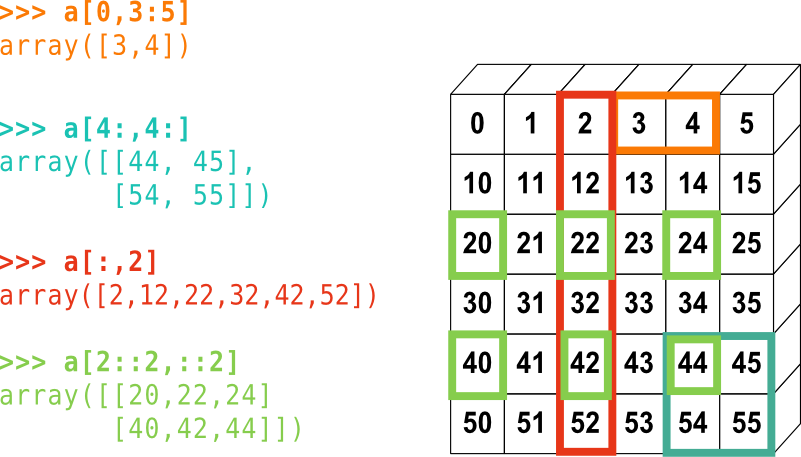

In [29]:
from IPython.display import Image
Image("numpy_indexing.png")
#a[0,3:5] is 1st row (1st axis) and elements 4,5 on 2nd dim
#a[4:,4:] is from 5th to end along 1st axis and same along 2nd axis

In [ ]:
# create here the np array used as example above (6x6 array) : generate a flat array from 0 to 55 and then re-shape it into 6x6

For multidimensional arrays, indexes are tuples of integers.

Note:
* in 2D, the first dimension corresponds to rows, the second to columns.
* for multidimensional a, a[0] is interpreted by taking all elements in the unspecified dimensions.

A slicing operation creates a view on the original array, which is just a way of accessing array data. Thus the original array is not copied in memory (reduces run time). You can use `np.may_share_memory()` to check if two arrays share the same memory block. Note however, that this uses heuristics and may give you false positives.

When modifying the view, the original array is modified as well, watch out!

In [30]:
a = np.diag(np.arange(3))
print (a,'\n')
print (a[1,1],'\n')
print (a[2],'\n')

# assignment
a[2, 1] = 10 # third line, second column. This is a modification!!!! Affects also original array
print (a,'\n')

[[0 0 0]
 [0 1 0]
 [0 0 2]] 

1 

[0 0 2] 

[[ 0  0  0]
 [ 0  1  0]
 [ 0 10  2]] 



## Fancy indexing

NumPy arrays can be indexed with slices, but also with boolean or integer arrays (masks). 
A mask takes all the elements satisfying a certain criteria. This method is called fancy indexing. It creates copies not views.

In [34]:
a = np.random.randint(0, 21, 15) #array of 15 random integers between 0 and 21
print ("original array:", a,'\n')

mask = (a % 3 == 0) #this mask creates an array of same shape as the original but with boolean elements
print ("the mask:", mask,'\n') #we'll have true instead of elements which are multiples of 3 and false in the other case

filtered_a = a[mask] #keeps only the elements that are multiples of 3(true in the mask)
# equivalent to a[a%3==0]
print ("the filtered array:", filtered_a,'\n')

filtered_a = np.arange(15) #i modify the filtered one
print ("the modified filtered array:", filtered_a,'\n')
print ("original array:", a,'\n') #not modified! its a copy not a view!!

# Indexing with a mask can be very useful to assign a new value to a sub-array:
a[a % 3 == 0] = -1 #makes equal to -1 all the elements which are true in the mask
print ("the modified array:", a,'\n') #now a is modified

original array: [ 1 10 10  9  8 16  8 18 11 14 11 18  6  1 10] 

the mask: [False False False  True False False False  True False False False  True
  True False False] 

the filtered array: [ 9 18 18  6] 

the modified filtered array: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14] 

original array: [ 1 10 10  9  8 16  8 18 11 14 11 18  6  1 10] 

the modified array: [ 1 10 10 -1  8 16  8 -1 11 14 11 -1 -1  1 10] 



Indexing can be done with an array of integers (a[l] where indexes are specified in l), where the same index can be repeated several times. Note the notation!

In [35]:
a = np.arange(0, 100, 10) #array btwn 0 and 100 at steps of 10
l = [2, 3, 2, 4, 2] #a python list  
print ("selection of indexes: ",a[l],'\n')  # note: [2, 3, 2, 4, 2] is a Python list


selection of indexes:  [20 30 20 40 20] 



When a new array is created by indexing with an array of integers, the new array has the same shape as the array of integers:

In [36]:
a=np.arange(0,20,2) #create a 1D array
idx = np.array([[3,4],[9,7]]) # note the shape and the ordering
print (a[idx]) #i'm basically creating a new array with the elements i'm interested in associated to those indexes

[[ 6  8]
 [18 14]]


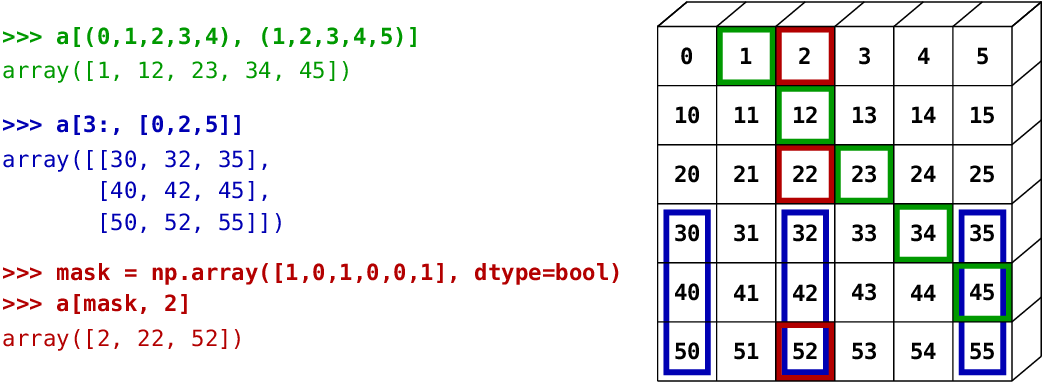

In [37]:
# an exstensive example of indexing
from IPython.display import Image
Image("numpy_fancy_indexing.png")

#red indexes: i'm applying the mask to the 3rd column

## Universal functions

usual functions are available.
In the following the first hints on visualization with `matplotlib`, the library for graphs

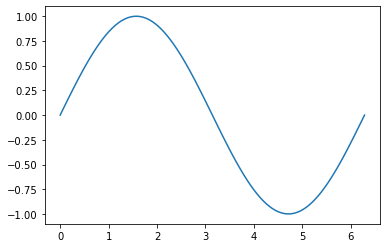

In [23]:
import matplotlib.pyplot as plt # everybody imports it that way

%matplotlib inline 
# tell jupyter to plot inline

xs = np.linspace(0, 2*np.pi, 100) #100 numbers btwn 0 and 2pi
ys = np.sin(xs) # np.sin is a universal function, it can be applied to an array: 
#I'll get another array with same dimension but whose elements are the sin of the previous ones
plt.plot(xs, ys);


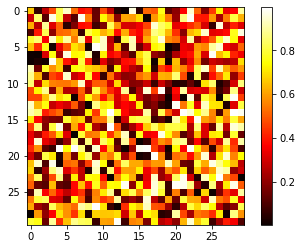

In [39]:
image = np.random.rand(30, 30) #to visualize random numbers
plt.imshow(image, cmap=plt.cm.hot)    
plt.colorbar()    

## Elementwise operations

### Basic operations

In [40]:
# operations with scalars
a=np.arange(4)
print (a+5,'\n') #add 5 to all elements
print (2**a,'\n') #matrix equal to 2^{element in that position}

[5 6 7 8] 

[1 2 4 8] 



In [41]:
# operations among 1D "vectors". All is elementwise
a=np.arange(4)
b = np.ones(4) + 1
print ("a-b:", a-b)
print ("a*b:", a*b)

# all is much faster than in plain python
%timeit np.arange(10000) + 1 #much faster
%timeit [i+1 for i in range(10000)] 

a-b: [-2. -1.  0.  1.]
a*b: [0. 2. 4. 6.]
12.6 µs ± 314 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)
729 µs ± 10.6 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


Array multiplication is not matrix multiplication!! Typically operations are elementwise. The * operator is a elementwise multiplication!! Matrix multiplication is done with "dot".

In [42]:
ones = np.ones((3,3))
print ('the original matrix:','\n',ones,'\n')

print ('the "*" product: ','\n',ones*ones,'\n')

print ('the actual matrix product: ','\n',ones.dot(ones),'\n')

the original matrix: 
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the "*" product:  
 [[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

the actual matrix product:  
 [[3. 3. 3.]
 [3. 3. 3.]
 [3. 3. 3.]] 



### Other operations

comparisons, logical, functions.
We'll see examples with 1D arrays but they work with every rank

In [3]:
# elementwise (between correspondent elements of arrays)
print ('equal?:',np.array([1,3,2,5]) == np.array([3,1,2,1])) #check if elements are the same
print ('greater than?:',np.array([1,3,2,5])>np.array([3,1,2,1]))
#returns array of bools

# array-wise
np.array_equal(np.array([1,3,2,5]),np.array([3,1,2,1])) #check if arrays are overall equal
#returns a single bool

equal?: [False False  True False]
greater than?: [False  True False  True]


False

In [5]:
# logical
a = np.array([1,1,0,0],bool)
b = np.array([1,0,1,0],bool)
print ("logical or:", np.logical_or(a,b))
print ("logical and:", np.logical_and(a,b))
#return array of bools

logical or: [ True  True  True False]
logical and: [ True False False False]


In [6]:
# functions
a=np.arange(1,9)
print ("sin:", np.sin(a))
print ("log:", np.log(a))

# works in whatever dimension
m=a.reshape(2,4)
print (m)
print ("exp:", np.exp(m))

sin: [ 0.84147098  0.90929743  0.14112001 -0.7568025  -0.95892427 -0.2794155
  0.6569866   0.98935825]
log: [0.         0.69314718 1.09861229 1.38629436 1.60943791 1.79175947
 1.94591015 2.07944154]
[[1 2 3 4]
 [5 6 7 8]]
exp: [[2.71828183e+00 7.38905610e+00 2.00855369e+01 5.45981500e+01]
 [1.48413159e+02 4.03428793e+02 1.09663316e+03 2.98095799e+03]]


In [7]:
# extracting off-diagonal terms
a = np.tril(np.arange(16).reshape(4,4), -1) # play with the last parameter! 
#tri = triangular, l =lowe, u =upper, the number decides form where you start the triangle of 0
#a= np.triu(np.arange(16).reshape(4,4), -1) # play with the last parameter (sign and value)!
print ("a:", '\n', a , '\n')

print ("transpose:", '\n', a.T , '\n') #a.T is a view!

a: 
 [[ 0  0  0  0]
 [ 4  0  0  0]
 [ 8  9  0  0]
 [12 13 14  0]] 

transpose: 
 [[ 0  4  8 12]
 [ 0  0  9 13]
 [ 0  0  0 14]
 [ 0  0  0  0]] 



N.B.: a linear algebra package exists in numpy, `numpy.linalg`, but performance-wise the scipy one, `scipy.linalg`, is way better, we will see that later. scipy has a more limited scope but it's more efficient.

## Reductions

I might want to set an array as argument of a scalar function (e.g. sum of all elements of the array). Operations on the elements of an array returning a (set of) scalar are available either as methods of the array class or as numpy functions.

In dimensions higher than one, the axis have to be specified

In [10]:
a=np.arange(1,7)
# just to mess it up (for random see later)
np.random.shuffle(a)
print (a)
print ("sum:", a.sum(), np.sum(a)) #two ways of implementing this
print ("min:", a.min(), np.min(a)) #gives element with min value
print ("max:", a.max(), np.max(a)) #gives element with max value
print ("index of the minimum argument:", a.argmin(), np.argmin(a)) 
print ("index of the maximum argument:", a.argmax(), np.argmax(a))
print ("mean:", a.mean(), np.mean(a))
print ("median:", np.median(a)) # so weird, median is not a method of the array class..
print ("standard deviation:", a.std(), np.std(a))
# and many others


# giving you a "chicca" here:
for function in ['sum','min','argmin','mean','median','std']:
    print (function, getattr(np, function)(a)) #loops over a set of strings
  


[2 6 4 1 3 5]
sum: 21 21
min: 1 1
max: 6 6
index of the minimum argument: 3 3
index of the maximum argument: 1 1
mean: 3.5 3.5
median: 3.5
standard deviation: 1.707825127659933 1.707825127659933
sum 21
min 1
argmin 3
mean 3.5
median 3.5
std 1.707825127659933


In [11]:
# all those things wors as well in higher dimensions (usually you have to specify the axis)

m=a.reshape(3,2)
print (m,'\n')

print ("sum along the columns:", m.sum(axis=0))
print ("sum along the rows:", m.sum(axis=1))

[[2 6]
 [4 1]
 [3 5]] 

sum along the columns: [ 9 12]
sum along the rows: [8 5 8]


## Broadcasting

So far we have seen elementwise operations on arrays, which works only on arrays of the same size/shape (Verify that out!!).

Nevertheless, It’s also possible to do operations on arrays of different
sizes if NumPy can transform these arrays so that they all have
the same size: this conversion is called broadcasting.

The interpreter can guess what you want to do and transform the arrays accordingly. It's a bit tricky if used wrongly.

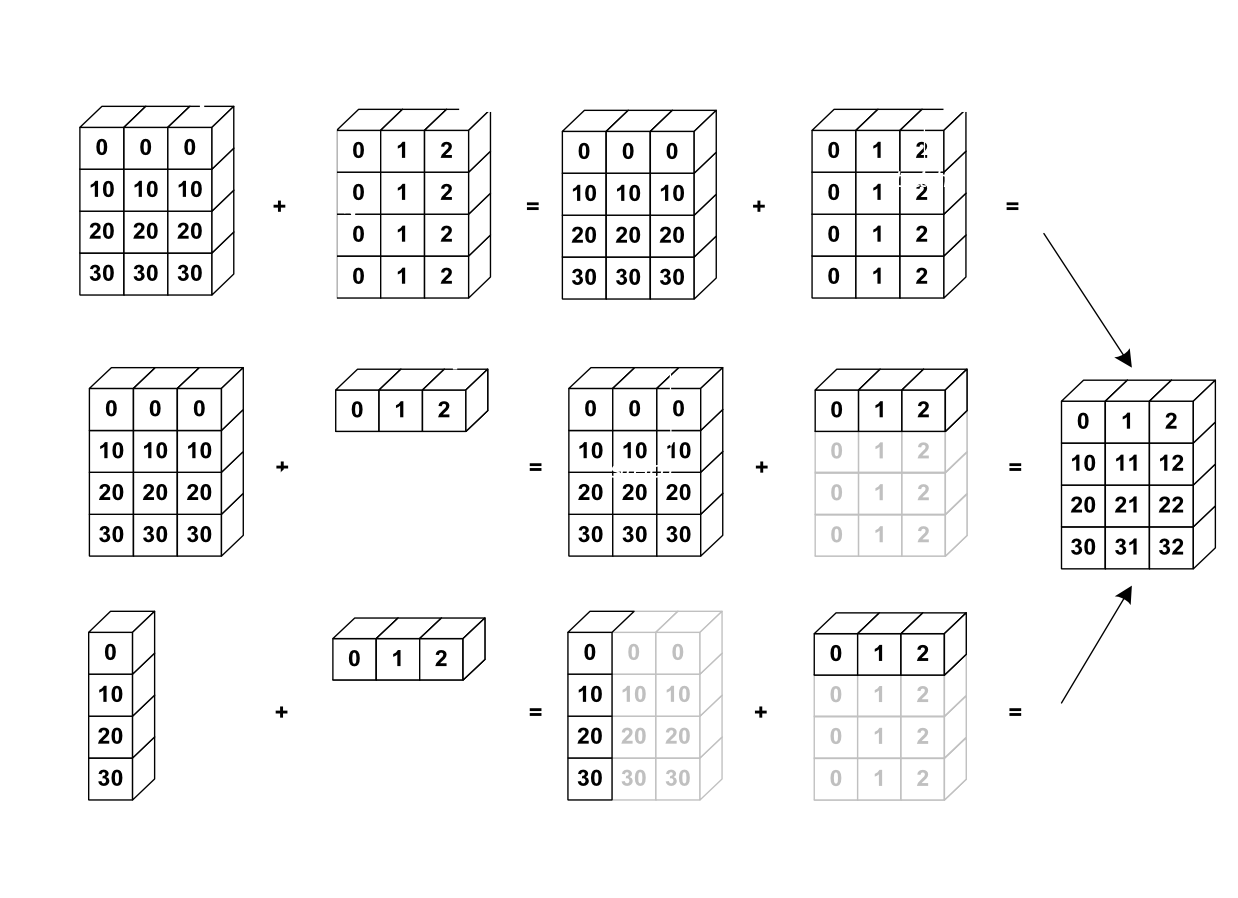

In [12]:
from IPython.display import Image
Image("numpy_broadcasting.png")

#1st ex: elementwise sum btwn arrays of same dimension
#2nd ex: the second array has less row so it's interpreted as a repetition of the 1st row
#3rd ex: both arrays are extended to have same dimension

#in the end all 3 give the same result

In [14]:
a = np.tile(np.arange(0, 40, 10), (3, 1)).T # check what exactly np.tile does! 
#tile repeats elements to match dimension specified (here a 4x1 vect is extended by 3)
print ("original array:",'\n',a,'\n')
print ("broadcasted sum :",'\n',a+np.arange(3),'\n')

original array: 
 [[ 0  0  0]
 [10 10 10]
 [20 20 20]
 [30 30 30]] 

broadcasted sum : 
 [[ 0  1  2]
 [10 11 12]
 [20 21 22]
 [30 31 32]] 



## More on shape manipulation

In [15]:
# adding a dimension (useful for linear algebra)
print ("new dim along axis 1:",'\n', np.arange(1,4)[:,np.newaxis],'\n')
print ("new dim along axis 0:",'\n', np.arange(1,4)[np.newaxis,:],'\n')

# resizing
print ("resizing:",'\n', np.resize(np.arange(4),(8,)),'\n')


new dim along axis 1: 
 [[1]
 [2]
 [3]] 

new dim along axis 0: 
 [[1 2 3]] 

resizing: 
 [0 1 2 3 0 1 2 3] 



# Random numbers

Numpy is the most widely used library for random number generation. There are two modules for (pseudo) random numbers that are commonly used. When all you need is to generate random numbers from some distribtuion, the `numpy.random` moodule is the simplest to use. When you need more information realted to a disttribution such as quantiles or the PDF, you can use the `scipy.stats` module, which will see later in the course.

In [16]:
import numpy.random as npr #usually used to perform operations which require stochasticity
npr.seed(123) # fix seed for reproducible result

### Random data

In [17]:
# random values from a uniform distrubtion in [0.0, 1.0) for a given shape
print ("uniform:",'\n', npr.rand(3,4),'\n') # shape=(3,4)
 
# random values from a standard normal distrubtion  for a given shape
print ("normal:",'\n', npr.randn(2,5),'\n') # shape=(2,5)

# random integers between "low" and "high" edges for a given shape (size)
print ("integers:",'\n', npr.randint(1,5,size=(3,6)),'\n') # shape=(3,6)

uniform: 
 [[0.69646919 0.28613933 0.22685145 0.55131477]
 [0.71946897 0.42310646 0.9807642  0.68482974]
 [0.4809319  0.39211752 0.34317802 0.72904971]] 

normal: 
 [[-0.67888615 -0.09470897  1.49138963 -0.638902   -0.44398196]
 [-0.43435128  2.20593008  2.18678609  1.0040539   0.3861864 ]] 

integers: 
 [[2 4 1 1 1 3]
 [2 2 3 3 4 3]
 [2 1 1 4 3 2]] 



### Operations on arrays

In [18]:
# randomly shuffling a vector
x = np.arange(10)
npr.shuffle(x)
print ("reshuffling:",'\n', x,'\n')
# npr.permutation works similarly

# Generates a random sample from a given 1-D array (without replacement)
x = np.arange(10,20)
print ("choice w/o replace",'\n',npr.choice(x, 10, replace=False),'\n')

# Generates a random sample of a given dimension from a given 1-D array
print ("choice w/o replace",'\n',npr.choice(x, (5, 10), replace=True),'\n') # this is default


reshuffling: 
 [4 3 1 9 6 5 7 8 2 0] 

choice w/o replace 
 [19 11 18 17 10 12 13 15 16 14] 

choice w/o replace 
 [[14 17 16 17 11 15 17 19 12 14]
 [18 11 12 11 11 13 15 19 10 18]
 [11 16 13 13 15 19 17 19 12 13]
 [13 13 18 16 19 17 16 13 19 16]
 [16 16 11 13 14 13 11 10 15 18]] 



## Probability Density Functions

numbers can be drawn from basically any common PDF (normal, binomial, chisquare, etc..)

But we'll rather use scipy

In [19]:
# exponential
print ("exponential:",'\n', npr.exponential(10, size=(3,2)),'\n')

exponential: 
 [[ 7.07660628  3.29606339]
 [14.43231741  1.14897286]
 [ 7.16732577 24.05386637]] 



In [20]:
# tossing a dice
roll = 1./6
x = npr.multinomial(20000, [roll]*6, size=2) #draws 20000 values btwn 1-6 with equiprobability
print ("frequencies of 6-faces dice tossing (two players):",'\n', x)

frequencies of 6-faces dice tossing (two players): 
 [[3325 3367 3323 3403 3360 3222]
 [3242 3311 3321 3323 3351 3452]]


In [21]:
# toy example - estimating pi inefficiently
n = int(1e6)
x = npr.uniform(-1,1,(n,2))
4.0*np.sum(x[:,0]**2 + x[:,1]**2 < 1)/n

3.141304

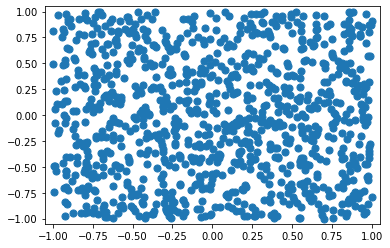

In [27]:
# uniformly distributed numbers in 2D
x = npr.uniform(-1, 1, (1000, 2))
plt.scatter(x[:,0], x[:,1], s=50)
plt.axis([-1.05, 1.05, -1.05, 1.05]);